# MNIST Classification - Single Layer NN

In [19]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
import numpy as np
from matplotlib import pyplot as plt
tf.set_random_seed(0)

In [20]:
# download train and test data (28x28 images of handwritten digits)
mnist = mnist_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


In [21]:
# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])
# weights W[784, 10]   784=28*28
W = tf.Variable(tf.zeros([784, 10]))
# biases b[10]
b = tf.Variable(tf.zeros([10]))

In [22]:
# flatten the images into a single line of pixels
# -1 in the shape definition means "the only possible dimension that will preserve the number of elements"
XX = tf.reshape(X, [-1, 784])

In [23]:
# The model
Z = tf.matmul(XX, W) + b
Y = tf.nn.softmax(Z)

In [25]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

In [26]:
# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [27]:
# to keep track of max accuracy
max_accuracy = 0.0

In [28]:
# training, learning rate = 0.005
train_step = tf.train.GradientDescentOptimizer(0.005).minimize(cross_entropy)

In [29]:
# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

train_loss_log = []
test_loss_log = []
train_accuracy_log = []
test_accuracy_log = []

In [30]:
# You can call this function in a loop to train the model, 100 images at a time
def training_step(i):

    global max_accuracy
    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # compute training values
    if (i % 10 == 0):
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_: batch_Y})
        train_accuracy_log.append([i,a])
        train_loss_log.append([i,c])        
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values
    if (i % 50 == 0):
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y_: mnist.test.labels})
        test_accuracy_log.append([i,a])
        test_loss_log.append([i,c])  
        if (a > max_accuracy):
            max_accuracy = a

        print(str(i) + ": $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y})

In [31]:
# run this thang
for i in range(2000+1): 
    training_step(i)

0: accuracy:0.12 loss: 230.25853
0: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.098 test loss: 230.25717
10: accuracy:0.83 loss: 79.80014
20: accuracy:0.78 loss: 67.31489
30: accuracy:0.81 loss: 56.81697
40: accuracy:0.86 loss: 46.953423
50: accuracy:0.87 loss: 45.26821
50: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.8844 test loss: 43.806767
60: accuracy:0.88 loss: 44.120205
70: accuracy:0.87 loss: 51.112354
80: accuracy:0.83 loss: 49.77597
90: accuracy:0.89 loss: 46.423023
100: accuracy:0.96 loss: 26.21822
100: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.8957 test loss: 38.26991
110: accuracy:0.89 loss: 45.008816
120: accuracy:0.87 loss: 56.37574
130: accuracy:0.93 loss: 28.819355
140: accuracy:0.92 loss: 33.3647
150: accuracy:0.86 loss: 40.54546
150: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.897 test loss: 36.479397
160: accuracy:0.91 loss: 31.417456
170: accuracy:0.87 loss: 48.12224
180: accuracy:0.91 loss: 43.438354
190: accuracy:0.86 loss: 51.654755
200: accuracy:0.91 loss: 43.564365
200: 

1780: accuracy:0.9 loss: 29.541624
1790: accuracy:0.92 loss: 34.42422
1800: accuracy:0.92 loss: 28.952005
1800: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9206 test loss: 28.68237
1810: accuracy:0.94 loss: 22.223217
1820: accuracy:0.92 loss: 18.924774
1830: accuracy:0.94 loss: 17.040804
1840: accuracy:0.89 loss: 29.300129
1850: accuracy:0.94 loss: 26.908802
1850: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9195 test loss: 28.454012
1860: accuracy:0.92 loss: 21.995783
1870: accuracy:0.93 loss: 21.566753
1880: accuracy:0.96 loss: 36.49234
1890: accuracy:0.95 loss: 21.377687
1900: accuracy:0.93 loss: 29.208857
1900: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9213 test loss: 28.04355
1910: accuracy:0.93 loss: 31.672318
1920: accuracy:0.96 loss: 14.404064
1930: accuracy:0.92 loss: 39.406364
1940: accuracy:0.91 loss: 20.703032
1950: accuracy:0.89 loss: 35.34832
1950: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9211 test loss: 28.671015
1960: accuracy:0.91 loss: 29.120264
1970: accuracy:0.9 loss: 33.74

In [32]:
print("max test accuracy: " + str(max_accuracy))

max test accuracy: 0.9226


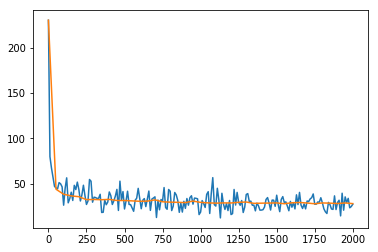

In [33]:
train_loss_log = np.array(train_loss_log)
test_loss_log = np.array(test_loss_log)

plt.plot(train_loss_log[:,0],train_loss_log[:,1])
plt.plot(test_loss_log[:,0],test_loss_log[:,1])
plt.show()

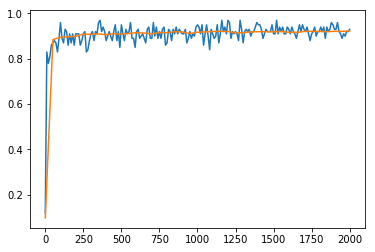

In [34]:
train_accuracy_log = np.array(train_accuracy_log)
test_accuracy_log = np.array(test_accuracy_log)

plt.plot(train_accuracy_log[:,0],train_accuracy_log[:,1])
plt.plot(test_accuracy_log[:,0],test_accuracy_log[:,1])
plt.show()